# Support vector machine
Meichen Lu (meichenlu91@gmail.com) 13rd April 2018

Support vector machine exploration
First the [iris dataset from Scikit Learn example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) will be reproduced, then a simple 2-class example will be explored.

Theory:
- Polynomial kernel examined in details

Programming:
- Visualising the classification domain using a grid
- Examining multiple prediction models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, datasets

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [4]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [5]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

In [6]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

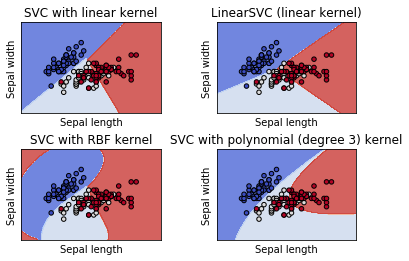

In [7]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

## Example of linearly separable points in 2D

In [8]:
X = np.array([[1,7],[2,8],[3,8],[5,1], [6,-1],[7,3],])
Y = np.array([1,1,1,-1,-1,-1])

In [9]:
lin_svm = svm.SVC(kernel='linear', C=C)
lin_svm.fit(X,Y)
lin_svm.support_vectors_

array([[ 7.,  3.],
       [ 3.,  8.]])

In [10]:
# SVM decision boundary
w = lin_svm.coef_
b = lin_svm.intercept_
x1 = np.linspace(0,8,10)
x2 = (-b - w[0,0]*x1)/w[0,1]

[0.0, 7.9800000000000004, -2.0, 8.9800000000000093]

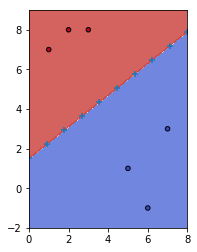

In [11]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax = plt.gca()
plot_contours(ax, lin_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.scatter(x1, x2, marker = '+')
plt.axis('scaled')
plt.axis([xx.min(), xx.max(), yy.min(), yy.max()])

In [12]:
# Degree 2 polynomial
poly_svm = svm.SVC(kernel='poly', degree=2, C=C)
poly_svm.fit(X,Y)
poly_svm.support_vectors_

array([[ 5.,  1.],
       [ 1.,  7.]])

(-2.0, 8.9800000000000093)

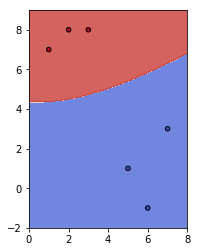

In [13]:
ax = plt.gca()
plot_contours(ax, poly_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.axis('scaled')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

### Interpreting polynomial SVM
To construct the high dimensional vector.
It is cumbersome - the kernel trick avoids generating the high dimensional space!

In [14]:
# Construct the 2nd order polynomial feature space
X2 = np.zeros((6,5))
X2[:,:2]=X
X2[:,2] = (X[:,0]*X[:,0]).reshape([1,-1])
X2[:,3] = np.sqrt(2)*(X[:,0]*X[:,1]).reshape([1,-1])
X2[:,4] = (X[:,1]*X[:,1]).reshape([1,-1])
print(X2)

[[  1.           7.           1.           9.89949494  49.        ]
 [  2.           8.           4.          22.627417    64.        ]
 [  3.           8.           9.          33.9411255   64.        ]
 [  5.           1.          25.           7.07106781   1.        ]
 [  6.          -1.          36.          -8.48528137   1.        ]
 [  7.           3.          49.          29.69848481   9.        ]]


In [15]:
# Use linear kernel on the high-dimensional space
lin_svm2 = svm.SVC(kernel='linear', C=C)
lin_svm2.fit(X2,Y)
lin_svm2.support_vectors_

array([[  5.        ,   1.        ,  25.        ,   7.07106781,   1.        ],
       [  1.        ,   7.        ,   1.        ,   9.89949494,  49.        ]])

(0.0, 7.9800000000000004, -2.0, 8.9800000000000093)

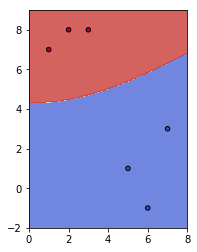

In [16]:
# Visualise the results of the liear prediction
xxx = xx.ravel()
yyy = yy.ravel()
Z = lin_svm2.predict(np.c_[xxx,yyy,xxx*xxx,np.sqrt(2)*xxx*yyy,yyy*yyy])
Z = Z.reshape(xx.shape)
ax = plt.gca()
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.axis('scaled')

In [17]:
lin_svm2.coef_

array([[-0.00272109,  0.00408163, -0.01632653,  0.0019241 ,  0.03265306]])

In [18]:
lin_svm2.intercept_

array([-0.62857143])

Using this numbers, we can write the equation for the polynomial SVM is thus
$$ -0.0027x_1+0.0041x_2-0.0163*x_1^2+0.0019/1.414*x_1*x_2+0.0327*x_2^2 -0.6286 = 0$$

In [19]:
x1 = np.linspace(0,8,10)
x2 = []
for i in x1:
    coeff = [0.03265306, 0.0019241/1.414*i+0.00408163,-0.00272109*i-0.01632653*(i**2) - 0.62857143 ]
    x2.append(np.roots(coeff)[1])

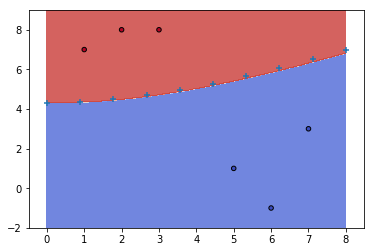

In [55]:
ax = plt.gca()
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.scatter(x,y,marker = '+')
plt.axis('scaled')

In [65]:
X = iris.data[:, :2]
y = iris.target
lin_ovo = svm.SVC(kernel='linear', C=C,decision_function_shape='ovo')
lin_ovo.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

162

array([ 8, 39, 34], dtype=int32)